# Pregunta 1
**Utilizar una inteligencia artificial entrenada de clasificación,e incorporar 3 datos que los pueda clasificar y 1 datos que no pueda clasificar. Especificar los resultados de su comprobación.**

---

---





In [ ]:
#importamos las librerias necesarias para la clasificación
import torch
from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms
from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt
import torch.nn as nn
import torch.optim as optim

In [ ]:
#Utilizamos el modelo Alexnet
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


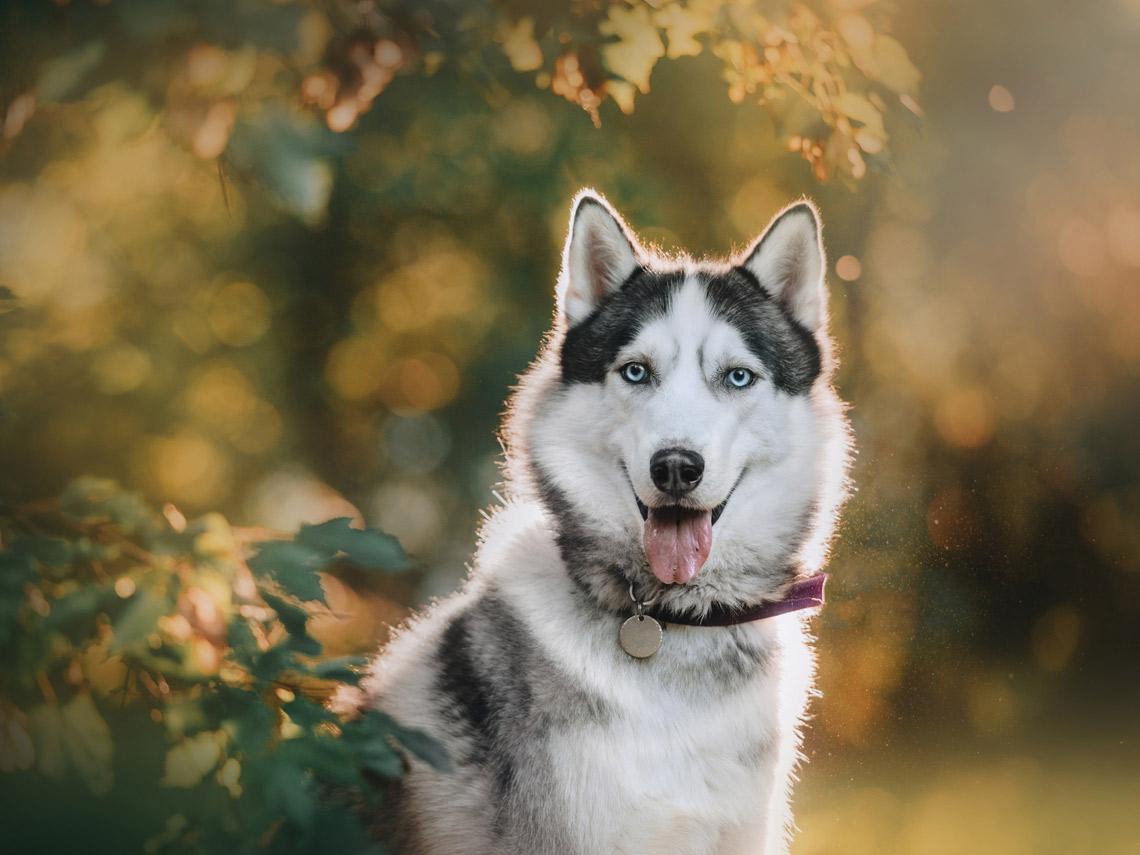

In [ ]:
#importamos las urls de las imagenes a clasificar
urls=[
      "https://estaticos.muyinteresante.es/media/cache/1140x_thumb/uploads/images/gallery/59bbb29c5bafe878503c9872/husky-siberiano-bosque.jpg",
      "https://i.blogs.es/f32047/xiaomi-mi-notebook/840_560.jpg",
      "https://casika.es/7172-large_default/portavelas-beche-vaso-cristal-5-colores.jpg",
      "https://www.definicionabc.com/wp-content/uploads/2013/05/Foco.jpg"
]
image = request.urlretrieve(urls[0], "test.jpg")
image1 = request.urlretrieve(urls[1], "test1.jpg")
image2 = request.urlretrieve(urls[2], "test2.jpg")
image3 = request.urlretrieve(urls[3], "test3.jpg")
img=Image.open(image[0])
img1=Image.open(image1[0])
img2=Image.open(image2[0])
img3=Image.open(image3[0])
#Muestro las imagenes
img

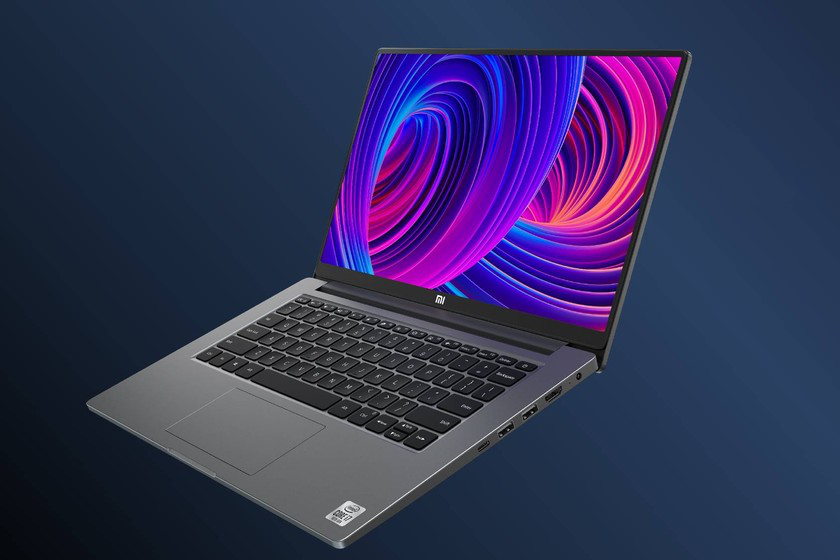

In [ ]:
img1

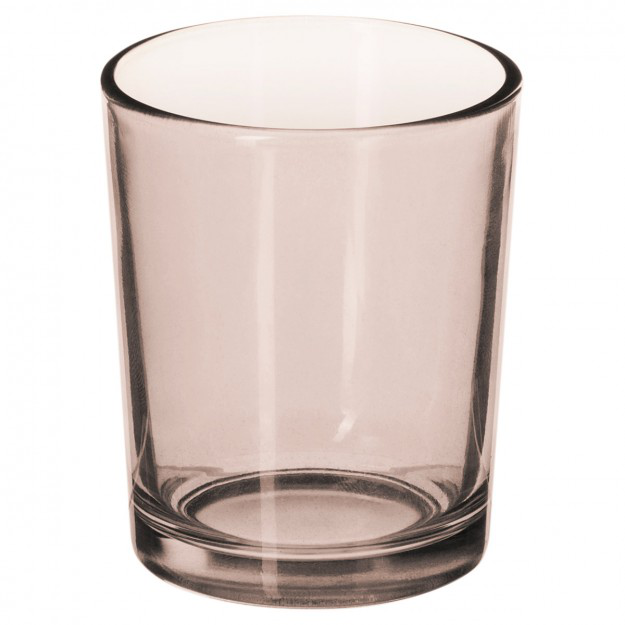

In [ ]:
img2

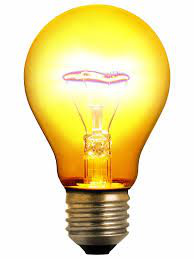

In [ ]:
img3

In [ ]:
preprocess = transforms.Compose([
  transforms.Resize(399),
  transforms.CenterCrop(299),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485,0.456, 0.406],
      std=[0.229, 0.224, 0.255]
  )                  
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


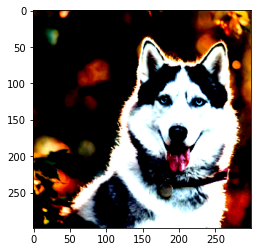

In [ ]:
img_t = preprocess(img)
img_t1 = preprocess(img1)
img_t2 = preprocess(img2)
img_t3 = preprocess(img3)

batch = torch.unsqueeze(img_t, 0)
batch1 = torch.unsqueeze(img_t1, 0)
batch2 = torch.unsqueeze(img_t2, 0)
batch3 = torch.unsqueeze(img_t3, 0)

plt.imshow(img_t.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


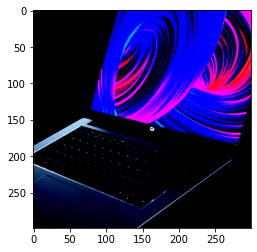

In [ ]:
plt.imshow(img_t1.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


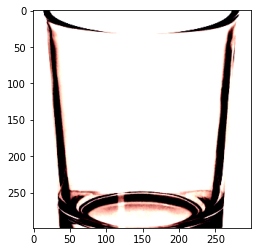

In [ ]:
plt.imshow(img_t2.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


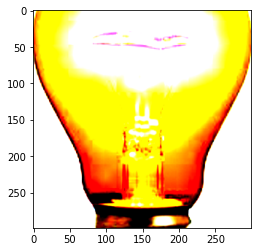

In [ ]:
plt.imshow(img_t3.permute(1,2,0))

In [ ]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
out = alexnet(batch)
out1 = alexnet(batch1)
out2 = alexnet(batch2)
out3 = alexnet(batch3)
out

tensor([[-3.0217e+00, -3.3237e+00,  6.1406e-01,  1.8046e-01, -7.1788e-01,
         -6.0176e-01, -2.0295e+00, -2.1937e+00, -1.6295e+00, -7.6146e-01,
         -3.2514e+00, -2.0134e+00, -4.3655e+00, -2.5508e+00, -1.7980e+00,
         -3.0855e+00, -2.4214e-01,  2.9359e+00, -2.9701e+00, -2.0996e+00,
         -2.7052e+00, -1.2444e-01, -3.4862e+00, -2.6923e+00, -1.3412e+00,
         -2.3432e+00, -5.6191e-01, -1.7619e+00, -1.4699e+00, -1.7695e+00,
         -2.1816e+00, -3.0483e+00, -3.5699e+00, -2.4470e+00, -1.7066e+00,
         -2.5329e+00,  8.8616e-01, -2.0398e+00, -2.6028e+00, -1.7040e+00,
         -2.6430e+00, -2.7758e+00, -2.7066e+00, -1.1984e+00, -2.9618e+00,
         -3.0364e+00, -2.8125e+00, -1.0738e+00, -2.5215e+00, -5.0796e-02,
         -1.5556e+00,  1.2788e+00, -3.0913e+00, -1.0164e+00, -1.3959e+00,
         -2.6053e+00, -3.3177e+00, -2.2560e+00, -2.1856e+00, -2.9032e+00,
         -3.5909e+00, -3.1745e+00, -1.1092e+00, -2.2856e+00, -3.2554e+00,
         -2.3109e+00, -1.1958e+00, -2.

In [ ]:
request.urlretrieve("https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt","labels.txt")
with open("labels.txt") as f:
  labels = [line.strip() for line in f.readlines()]

In [ ]:
out

tensor([[-3.0217e+00, -3.3237e+00,  6.1406e-01,  1.8046e-01, -7.1788e-01,
         -6.0176e-01, -2.0295e+00, -2.1937e+00, -1.6295e+00, -7.6146e-01,
         -3.2514e+00, -2.0134e+00, -4.3655e+00, -2.5508e+00, -1.7980e+00,
         -3.0855e+00, -2.4214e-01,  2.9359e+00, -2.9701e+00, -2.0996e+00,
         -2.7052e+00, -1.2444e-01, -3.4862e+00, -2.6923e+00, -1.3412e+00,
         -2.3432e+00, -5.6191e-01, -1.7619e+00, -1.4699e+00, -1.7695e+00,
         -2.1816e+00, -3.0483e+00, -3.5699e+00, -2.4470e+00, -1.7066e+00,
         -2.5329e+00,  8.8616e-01, -2.0398e+00, -2.6028e+00, -1.7040e+00,
         -2.6430e+00, -2.7758e+00, -2.7066e+00, -1.1984e+00, -2.9618e+00,
         -3.0364e+00, -2.8125e+00, -1.0738e+00, -2.5215e+00, -5.0796e-02,
         -1.5556e+00,  1.2788e+00, -3.0913e+00, -1.0164e+00, -1.3959e+00,
         -2.6053e+00, -3.3177e+00, -2.2560e+00, -2.1856e+00, -2.9032e+00,
         -3.5909e+00, -3.1745e+00, -1.1092e+00, -2.2856e+00, -3.2554e+00,
         -2.3109e+00, -1.1958e+00, -2.

In [ ]:
_, index = torch.max(out, 1)
_, index1 = torch.max(out1, 1)
_, index2 = torch.max(out2, 1)
_, index3 = torch.max(out3, 1)

In [ ]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

In [ ]:
#Si reconoce, me dice que es un perro de raza husky
labels[index[0]], percentage[index[0]].item()

('Eskimo dog, husky', 50.22370910644531)

In [ ]:
#Si reconoce, me dice que es una computadora
labels[index1[0]], percentage[index1[0]].item()

('notebook, notebook computer', 1.0364285117248073e-05)

In [ ]:
#Si reconoce, me dice que es un vaso de cerveza
labels[index2[0]], percentage[index2[0]].item()

('beer glass', 3.4762734912874294e-07)

In [ ]:
#No reconoce, me dice que es una secadora de pelo pero es un foco.
labels[index3[0]], percentage[index3[0]].item()

('hand blower, blow dryer, blow drier, hair dryer, hair drier',
 1.3250770507511334e-06)

# Pregunta 2
**Usar un data set de su elección, NO CIFAR10, con el fin de crear TRES clasificadores dicótomicos. Capases de recibir datos o imágenes(URL) externos. (se comprobara con datos su efectividad)**

---

---





In [ ]:
data_path = 'data/'
full_data_set = datasets.CIFAR100(data_path, train=True, download=True, transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ]))

full_validation_set = datasets.CIFAR100(data_path, train=True, download=True, transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
size = 3
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


sunflower
cloud
lobster


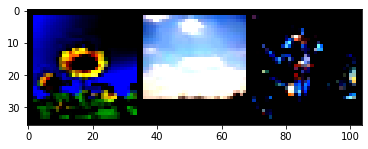

In [ ]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 
plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])


In [ ]:
#Especificamos las clases que queremos usar.
class_names = ['beetle', 'bicycle','bottle']
label_map = {7:0, 8:1, 9:2}
data_set = [(img, label_map[label]) for img, label in full_data_set if label in [7, 8, 9]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [7, 8, 9]]


In [ ]:
img, label = data_set[200]
img.shape

torch.Size([3, 32, 32])

In [ ]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])

print(softmax(x))
print(softmax(x).sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [ ]:
model = nn.Sequential(
    nn.Linear(3 * 32* 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
    )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'bicycle'

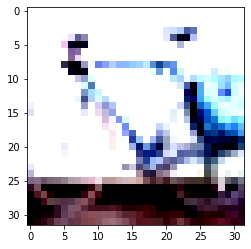

In [ ]:
img, label = data_set[501]
plt.imshow(img.permute(1,2,0))
#Me imprime un bicycle, que es el que esta en la posición 500
class_names[label]

In [ ]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[-3.5580,  4.5577, -0.8211]], grad_fn=<AddmmBackward>)

In [ ]:
_, index = torch.max(out, dim=1)
#Me imprime que la bicicleta es un bicycle
print('->', class_names[label],'model:',class_names[index])

-> bicycle model: bicycle


# Clasificador conectado

---



In [ ]:
model = nn.Sequential(
    nn.Linear(3 * 32* 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
    )
loss_function = nn.NLLLoss()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'bicycle'

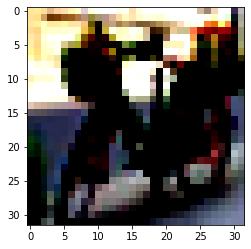

In [ ]:
img, label = data_set[120]
plt.imshow(img.permute(1,2,0))
class_names[label]

In [ ]:
out = model(img.view(-1).unsqueeze(0))
print(out)
print('->', class_names[label], 'model:',class_names[index])

tensor([[0.4243, 0.5757]], grad_fn=<SoftmaxBackward>)
-> bicycle model: beetle


In [ ]:
model = nn.Sequential(
    nn.Linear(3 * 32* 32, 512),
    nn.Tanh(),
    nn.Linear(512, 3),
    nn.LogSoftmax(dim=1)
    )
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 5
for epoch in range (n_epochs):
  for img, label in data_set:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_function(out, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.998163
Epoch: 1, Loss: 2.500890
Epoch: 2, Loss: 0.438127
Epoch: 3, Loss: 5.404804
Epoch: 4, Loss: 2.255366


In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predicted == labels).sum())
print("Accucacy: %f" % (correct / total))

Accucacy: 0.690000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  bicycle  model: bicycle


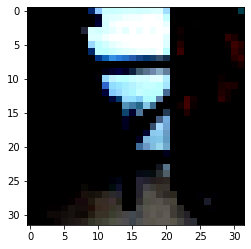

In [ ]:
img, label = validation_set[1]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:', class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

# Mejoras

---



In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072,1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Linear(256, 128),
    nn.Tanh(),
    nn.Linear(128, 3)
    )
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 100

for epoch in range(n_epochs):
  for img, label in train_loader:
    out = model(img.view(img.shape[0],-1))
    loss = loss_function(out, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 99, Loss: 0.017004


In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predicted == labels).sum())
print("Accucacy: %f" % (correct / total))

Accucacy: 1.000000


In [ ]:
sum([p.numel() for p in model.parameters() if p.requires_grad ==True])

3836163

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Correct: bicycle  model: bicycle


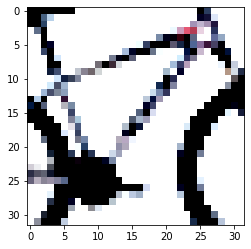

In [ ]:
#El clasificador acierta me dice que es un bicycle.
url = 'https://cdn.shopify.com/s/files/1/1176/9566/products/Blast_2.5_gris.jpg?v=1564787022'
image = request.urlretrieve(url, 'test1.jpg')
img = Image.open(image[0])

preprocess = transforms.Compose([
                                 transforms.Resize(48),
                                 transforms.CenterCrop(32),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[0.4915, 0.4823, 0.4468],
                                     std=[0.2470, 0.2435, 0.2616]
                                 )
])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out,dim=1)
#modelo correcto bicycle, si acierta
print('Correct: bicycle ','model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Correct beetle:  model: beetle


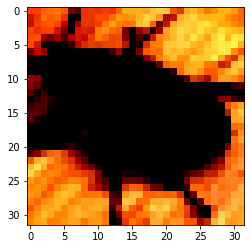

In [ ]:
#El clasificador acierta me dice que es un beetle.
url = 'https://static.diariofemenino.com/media/5761/c/sonar-con-un-escarabajo-suenos-protectores-lg.jpg'
image = request.urlretrieve(url, 'test1.jpg')
img = Image.open(image[0])

preprocess = transforms.Compose([
                                 transforms.Resize(48),
                                 transforms.CenterCrop(32),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[0.4915, 0.4823, 0.4468],
                                     std=[0.2470, 0.2435, 0.2616]
                                 )
])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out,dim=1)
print('Correct beetle: ','model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Correct: computer  model: bicycle


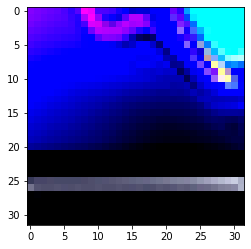

In [ ]:
#El clasificador se confunde, es una computadora pero me dice que es una bicleta.
url = 'https://img.global.news.samsung.com/mx/wp-content/uploads/2019/01/Notebook-9-Pro-3.jpg'
image = request.urlretrieve(url, 'test1.jpg')
img = Image.open(image[0])

preprocess = transforms.Compose([
                                 transforms.Resize(48),
                                 transforms.CenterCrop(32),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[0.4915, 0.4823, 0.4468],
                                     std=[0.2470, 0.2435, 0.2616]
                                 )
])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out,dim=1)
#correcto: computer
print('Correct: computer ','model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))